<div style="text-align: right">INFO 6105 Data Sci Engineering Methods and Tools, Week 7 Lecture 1</div>
<div style="text-align: right">Dino Konstantopoulos, 28 February 2022</div>

The **Method of Moments** is the simplest method to find out the parameters of a theoretical distribution that match your empirical distribution. But is it the best? 

>**Caution**: This lecture is *heavy* on math. Even though the math may appear scary in the beginning, it will be good for you to study it well because the math for artificial neural networks (ANN) is very similar.

<div id="divCheckbox" style="display: none;">
"20102020"[::-1]
</div>

# 1. Review
Let's build a **model** for a fair coin toss:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
probs = np.full((2), 1/2)
face = [0,1]

d:\Anaconda3.5.1\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Let's plot it:

(0, 1)

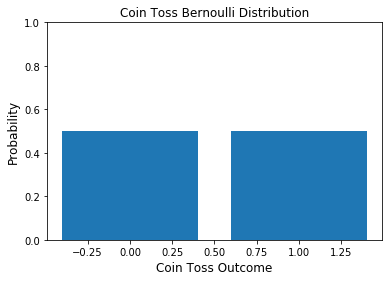

In [2]:
plt.bar(face, probs)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Coin Toss Outcome', fontsize=12)
plt.title('Coin Toss Bernoulli Distribution', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])

Let's build a **model** (histogram) for a *biased* coin toss:

In [3]:
probs = np.array([0.75, 0.25])
face = [0, 1]

(0, 1)

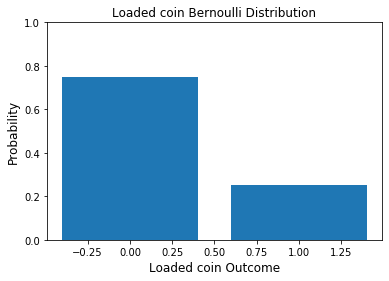

In [4]:
plt.bar(face, probs)
plt.title('Loaded coin Bernoulli Distribution', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Loaded coin Outcome', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])

# 2. Homework hints

- How to model throwing a die with data science? Is that a perfectly random event, or not? What is the histogram that matches the experiment? Build a **model**.

- Build a **weighted die** that matches a gaussian distribution instead (in other words, build a model for it).

0.9999999999999999


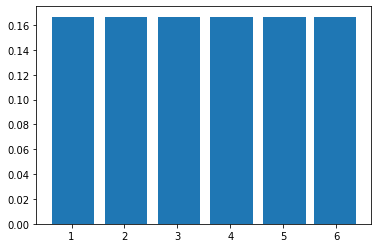

In [5]:
x = [1,2,3,4,5,6]
counts, bins = np.histogram(x, bins= 100)
bins = bins[:-1] + (bins[1] - bins[0])/2
probs = counts/float(counts.sum())
print(probs.sum()) # 1.0
plt.bar(bins, probs)
plt.show()

Another way:

(0, 1)

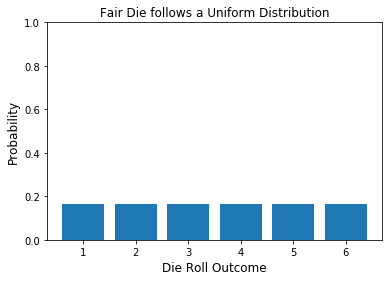

In [6]:
probs = np.full((6), 1/6) #Return a new array of shape (6) and type, filled with 1/6
face = [1,2,3,4,5,6]
plt.bar(face, probs)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Die Roll Outcome', fontsize=12)
plt.title('Fair Die follows a Uniform Distribution', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])

Loaded (unfair) die:

(0, 1)

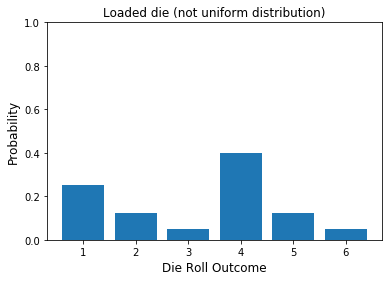

In [7]:
probs = np.array([0.25, 0.125, 0.05, 0.4, 0.125, 0.05])
face = [1,2,3,4,5,6]
plt.bar(face, probs)
plt.title('Loaded die (not uniform distribution)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Die Roll Outcome', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])

Loaded die with a gaussian distribution:

(0, 1)

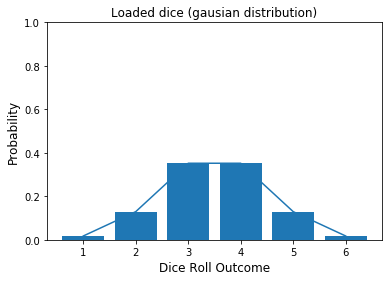

In [8]:
import scipy.stats as stats
n = np.arange(1, 7)
mean = 3.5
gaussian_dice = stats.norm.pdf(n, mean)
plt.plot(n, gaussian_dice)

face = [1,2,3,4,5,6]
plt.bar(face, gaussian_dice)
plt.title('Loaded dice (gausian distribution)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Dice Roll Outcome', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])

<div style="display: none;">
x = [0,1,2,3,4,5,6]
counts, bins = np.histogram(x, bins= 100)
bins = bins[:-1] + (bins[1] - bins[0])/2
probs = counts/float(counts.sum())
print(probs.sum()) # 1.0
plt.bar(bins, probs)
plt.show()

probs = np.full((6), 1/6)
face = \[1,2,3,4,5,6]
plt.bar(face, probs)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Dice Roll Outcome', fontsize=12)
plt.title('Fair Dice Uniform Distribution', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])

probs = np.array([0.25, 0.125, 0.05, 0.4, 0.125, 0.05])
face = [1,2,3,4,5,6]
plt.bar(face, probs)
plt.title('Loaded dice (not uniform distribution)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Dice Roll Outcome', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])

n = np.arange(1, 7)
mean = 3.5
gaussian_dice = stats.norm.pdf(n, mean, 0.9)
plt.plot(n, gaussian_dice)

face = [1,2,3,4,5,6]
plt.bar(face, gaussian_dice)
plt.title('Loaded dice (gausian distribution)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Dice Roll Outcome', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])
</div>

With these hints, do your homework *differently* than professor, and also build a **generative model** allowing you to actually roll your gaussian-loaded die and generate **random variates**. Then, generate 100 random variates from it. Plot their histogram. How close does it match the theoretical histogram? Evaluate the error.

# 3. Maximum Likelihood Estimation (MLE)

**Maximum likelihood estimation** (MLE) fitting is usually ***more work*** than the **method of moments** (MOM), but is ***preferred*** as the resulting estimator is known to have ***good theoretical properties***. MLE also uses the
same math principles as Neural Network models, namely *minimize a function by finding where its derivative is zero*, a.k.a. [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent).

MLE is a method of estimating the *parameters* of a statistical model, given observations. MLE attempts to find the parameter values that ***maximize the likelihood function, given the observations*** (remember the **likelihood factor** in **Bayes' formula**?). 

>**Essence**: We attempt to find the values of the parameters (estimators) which would most likely, from a probability perspective, produce the data that we observed. 

We usually go from model to data. We do not have the model, but we do have the data. So it is an ***inverse problem*** (btw, Inverse problems was the topic of my PhD thesis :-).

[Carl Friedrich Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss) and [Pierre-Simon Laplace](https://en.wikipedia.org/wiki/Pierre-Simon_Laplace) where early users of maximum likelihood. [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) popularized it between 1912 and 1922, but it remained rigorously unproven until [Samuel S. Wilks](https://en.wikipedia.org/wiki/Samuel_S._Wilks) in 1938. [Wilks' theorem](https://en.wikipedia.org/wiki/Wilks%27_theorem) shows that the ***error in the logarithm of likelihood values for estimates from multiple independent samples is [asymptotically distributed](https://en.wikipedia.org/wiki/Asymptotic_distribution)***. Wilks gave his most general proof of the theorem in 1962.

>**Note**: MLE is used often with **count models** (general rule of thumb for count models is that it is risky to use ML with samples smaller than 100, while samples over 500 seem adequate, so if you have only a couple hundred datapoints, ML won't work! In which case you need to fall back to MLE), **and** when we are interested in a dataset $(x,y)$ but are unable to obtain $y$ for the entire population $x$ and only able to obtain the $y$'s for a ***subset*** of $x$. 

A general approach in statistics is that if we are unable to obtain $y$ for the entire population $x$, it is common to assume all $y$ are **normally (gaussian) distributed** with some unknown **mean** and **variance**. The mean and variance are estimated with MLE while only knowing the $y$'s of a subset of $x$. 

>**Central Limit Theorem**: The [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) states that, given certain conditions, the mean of the $y_i$s of a large number of iterates of independent random variables $x_i$s will be approximately **normally distributed**, regardless of the underlying distribution. The central limit theorem has several variants. In its common form, the random variables $x_i$s must be identically distributed. In variants, convergence of the mean to the normal distribution also occurs for non-identical distributions or for non-independent observations, if they comply with certain conditions

<br />
<img src =ipynb.images/clt.png width = 600 />

Let’s choose an exponential distribution with labmda equal to two.

We draw one thousand random sample of size two from this exponential distribution, take the mean of each pair of two, and plot the histogram of the results.

In this case, the n of theorem would be two, and as we can observe the distribution doesn’t look like a normal distribution. If we take samples of size ten (n is now ten) and repeat the previous process, the distribution is a little bit more normal. And as n gets larger, it’s easy to see how the distributions of the sample mean looks more like a normal distribution.

<br />
<img src =ipynb.images/clt2.png width = 800 />

(array([3.85460757e-01, 2.28090224e-01, 1.34219258e-01, 7.82961302e-02,
        4.54398859e-02, 2.77646517e-02, 1.61280651e-02, 9.38615884e-03,
        5.53230142e-03, 3.03807739e-03, 1.86597963e-03, 8.72040732e-04,
        6.56374744e-04, 4.40708757e-04, 2.62549898e-04, 1.03144603e-04,
        5.62606924e-05, 4.68839103e-05, 0.00000000e+00, 1.87535641e-05]),
 array([3.55386679e-05, 1.06649948e+00, 2.13296343e+00, 3.19942738e+00,
        4.26589132e+00, 5.33235527e+00, 6.39881922e+00, 7.46528316e+00,
        8.53174711e+00, 9.59821105e+00, 1.06646750e+01, 1.17311389e+01,
        1.27976029e+01, 1.38640668e+01, 1.49305308e+01, 1.59969947e+01,
        1.70634587e+01, 1.81299226e+01, 1.91963866e+01, 2.02628505e+01,
        2.13293145e+01]),
 <a list of 20 Patch objects>)

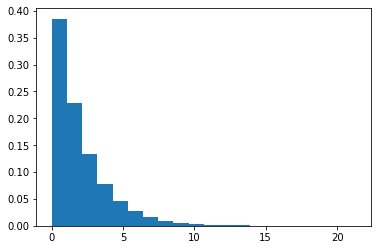

In [12]:
# import exponential
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
  
# Using exponential() method
exp_variates = np.random.exponential(2.0, 100000)
plt.hist(exp_variates, 20, density = True)

(array([2.32293022e-01, 3.53315043e-01, 2.85018838e-01, 1.83316597e-01,
        1.12481741e-01, 6.24247626e-02, 3.46558327e-02, 1.81611145e-02,
        1.00634706e-02, 4.98616977e-03, 2.70789377e-03, 1.34092816e-03,
        5.07730082e-04, 2.47355681e-04, 1.56224640e-04, 1.17168480e-04,
        1.30187200e-05, 1.30187200e-05, 1.30187200e-05, 2.60374401e-05]),
 array([9.07248975e-04, 7.69039598e-01, 1.53717195e+00, 2.30530430e+00,
        3.07343664e+00, 3.84156899e+00, 4.60970134e+00, 5.37783369e+00,
        6.14596604e+00, 6.91409839e+00, 7.68223074e+00, 8.45036308e+00,
        9.21849543e+00, 9.98662778e+00, 1.07547601e+01, 1.15228925e+01,
        1.22910248e+01, 1.30591572e+01, 1.38272895e+01, 1.45954219e+01,
        1.53635542e+01]),
 <a list of 20 Patch objects>)

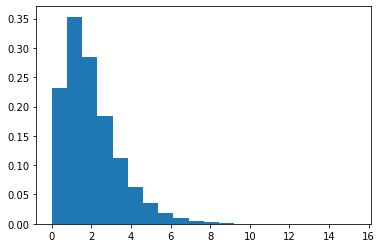

In [13]:
mean_2 = [(x + exp_variates[i+1]) / 2. for i,x in enumerate(exp_variates[:-1])]
plt.hist(mean_2, 20, density = True)

(array([3.430e+02, 2.267e+03, 3.587e+03, 2.469e+03, 9.500e+02, 2.960e+02,
        7.200e+01, 7.000e+00, 6.000e+00, 3.000e+00]),
 array([0.32919241, 0.86255347, 1.39591454, 1.9292756 , 2.46263666,
        2.99599772, 3.52935879, 4.06271985, 4.59608091, 5.12944197,
        5.66280304]),
 <a list of 10 Patch objects>)

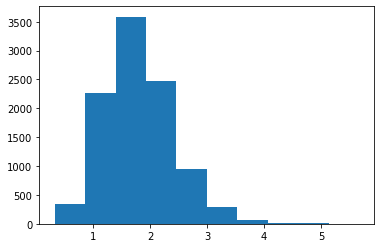

In [14]:
mean_10 = [sum(exp_variates[i:i+9]) / 10. for i in range(0, 100000, 10)]
plt.hist(mean_10)

(array([  8.,  55., 145., 192., 246., 180., 116.,  43.,  13.,   2.]),
 array([1.44463671, 1.56738881, 1.69014092, 1.81289302, 1.93564512,
        2.05839722, 2.18114932, 2.30390142, 2.42665353, 2.54940563,
        2.67215773]),
 <a list of 10 Patch objects>)

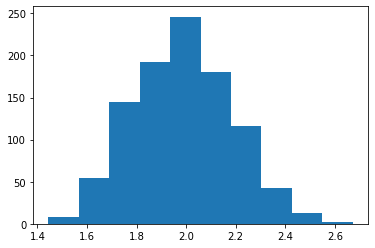

In [15]:
mean_100 = [sum(exp_variates[i : i + 99]) / 100. for i in range(0, 100000, 100)]
plt.hist(mean_100)

So, agreggating data into moments is a statistically normalizing operation in that the pdf looks normal.

Now, here's the secret sauce of the MLE algorithm:

- MLE takes the mean and variance as **parameters**, and finds values for these parameters that make the observed results (the subset) the ***most probable given a gaussian model***. The analysis is an **iterative** one, which proceeds until a metric called the **log likelihood** *converges*.

You will see it does sound very much like **variational inference** and **Markov Chain Monte Carlo** (MCMC) methods (when we'll look at these in class), but it's actually ***simpler***. From the point of view of Bayesian inference, MLE is a special case of [**maximum a posteriori estimation**](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP) that assumes a **uniform prior** distribution of the parameters. Priors are avoided by not making probability statements about the parameters, but only about their estimates, whose properties are fully defined by the observations and the statistical model.

First, let's start with a practical introduction to the notion of a [derivative](https://en.wikipedia.org/wiki/Derivative).

>**DEFINITION**: The derivative of a function of a single variable at a chosen input value, when it exists, is the slope of the tangent line to the graph of the function at that point. The tangent line is the best linear approximation of the function near that input value.

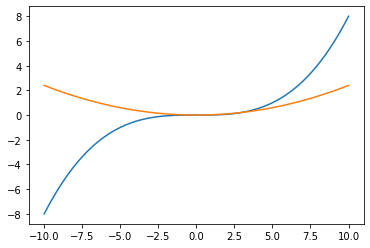

In [9]:
# Define function f(x) and mathematically evaluate f'(x)
def f(x):
    return (x/5)**3

def fp(x):
    return (3./5.)*(x/5)**2

# Interval x
xleft = -10.
xright = 10.

# Restrict the y range for nicer plots [optional]
ybottom = -8.
ytop = 8.

# plot the curve and derivative
X = np.linspace(xleft, xright, 1000)
Y = [f(x) for x in X]
Z = [fp(x) for x in X]
plt.plot(X,Y)
plt.plot(X,Z)
#slider = plot_tangent(f,fp,xleft,xright,ybottom,ytop)

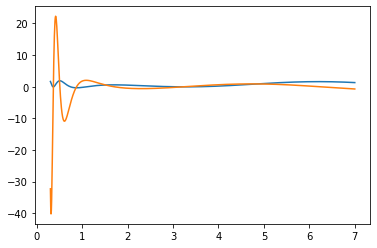

In [10]:
def f(x):
    return np.sin(4/x)+np.cos(x)# function goes here

def fp(x):
    return (-4*x**-2)*np.cos(4/x)-np.sin(x)# derivative goes here

# x interval
xleft = 0.3
xright = 7

# y interval
ybottom = -0.5
ytop = 2

# plot the curve and derivative
X = np.linspace(xleft, xright, 1000)
Y = [f(x) for x in X]
Z = [fp(x) for x in X]
plt.plot(X,Y)
plt.plot(X,Z)

## 3.1 Example data set

Say we have some data $y = y_1,y_2,\ldots,y_n$ that is distributed according to some distribution:

<div style="font-size: 120%;">  
$$Pr(Y_i=y_i \; | \;\lambda)$$
</div>

Assume the data is drawn from a Poisson distribution with parameter $\lambda =5$. 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[8, 7, 4, 3, 4, 5, 1, 5, 3, 5, 5, 6, 2, 3, 7, 2, 3, 7, 5, 5, 2, 7, 5, 4, 7, 4, 4, 5, 8, 4, 2, 5, 4, 1, 4, 5, 5, 4, 10, 4, 4, 8, 3, 2, 8, 5, 5, 6, 4, 12, 9, 2, 3, 4, 6, 2, 3, 8, 7, 9, 3, 8, 3, 3, 6, 4, 1, 7, 2, 6, 3, 1, 7, 6, 4, 9, 6, 7, 8, 6, 7, 7, 6, 6, 4, 5, 2, 7, 4, 2, 8, 7, 7, 7, 7, 3, 5, 3, 6, 4]


d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


Text(0, 0.5, 'Pr(y)')

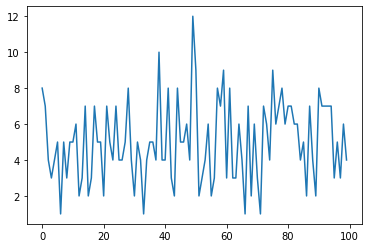

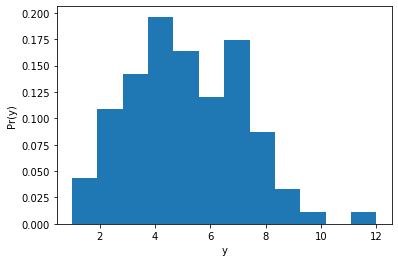

In [12]:
#y = np.random.poisson(5, size=100)
#plt.hist(y, bins=12, normed=True)
#plt.xlabel('y'); plt.ylabel('Pr(y)')

y = np.random.poisson(5, size=100)

print(list(y))
plt.figure(0)
plt.plot(list(y))

plt.figure(1)
plt.hist(y, bins=12, normed=True)
plt.xlabel('y'); plt.ylabel('Pr(y)')

## 3.2 The theory

The **likelihood function $l$** calculates the joint probability of observing $all$ the values of the dependent variable in our dataset, ***one after the other***, when we evaluate our model. So it's an **intersection** of events (really the intersection of *all possible events*), thus a **product of probabilities**. 

It assumes that each observation is drawn *randomly* and *independently* from the population. If the values of the dependent variable are random and independent, then you can find the joint probability of observing all the values one after the other by multiplying the individual density functions. Just like you would for two coin tosses that are heads!

$$l = \prod_{i=1}^n Pr(y_i \;| \;\lambda)$$ 

$l$ will give us a measure of how **likely we are** to observe values $y_1,\ldots,y_n$ given the parameter $\lambda$. 

**Maximum likelihood fitting** consists of **maximizing $l$** so that this outcome is **the most likely**. We call this function the *likelihood function*, because it is a measure of ***how likely the observations are if the model is true***.

We are essentially doing a kind of Bayesian inference: Instead of saying: ***the evidence are the observations, how do we get to the model?***, we say ***given the evidence of a model with an unknown parameter, how likely are the observations***? 

We come up with an equation that involves the parameter, which we want to maximize. This in turn yields the right parameter for the model. So, instead of using moments as we did with MOM, we find maxima on a function (which is also what ANNs, do by the way). It is also, I think, how ***your*** brain builds models: What are the right parameters so that my model yields my observations *most probably*?

And so we want to find those points where the derivative of the likelihood function is zero.

And you know what? The likelihood function can be ***computed analytically***, in closed form, ***for all popular analytic distribution models***! Just like the moments, for all popular distribution models. That's why we catalogue useful analytic distributions, so we can pre-evaluate their properties analytically.

So, let's recap: 

- The product $\prod_{i=1}^n Pr(y_i \; | \; \theta)$ gives us a measure of how **likely** it is to observe values $y_1,\ldots,y_n$ given the parameters $\lambda$. MLE consists in choosing the appropriate function $l= Pr(y|\theta)$ to maximize for a given set of observations. This function is called the *likelihood function*, because it is a measure of how likely the observations are if the model is true.

In the above model, the data were drawn from a Poisson distribution with parameter $\lambda =5$, That is,

$$L(x|\lambda=5) = \frac{e^{-5} 5^x}{x!}$$

Instead of looking at the function above as a function of $x$, let us now look at it as a *function of* $\lambda$. Let's calculate the likelihood that the underlying process with $\lambda = 5$ generates any given value of $y$ (note the sexy factorial evaluation below). But let's start with $x$ = 10.

For any given value of $x$, we can calculate its likelihood. We will use a python `lambda` function:

In [13]:
poisson_like = lambda x, lam: np.exp(-lam) * (lam**x) / (np.arange(x)+1).prod()

lam = 5
value = 10
poisson_like(value, lam)

0.01813278870782187

The probability above is for $x$ = 10. What is the probability for *all possible* $x$'s?

In [14]:
probs = [poisson_like(xi, lam) for xi in {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14}]
probs 

[0.006737946999085467,
 0.03368973499542734,
 0.08422433748856833,
 0.14037389581428056,
 0.1754673697678507,
 0.1754673697678507,
 0.1462228081398756,
 0.104444862957054,
 0.06527803934815875,
 0.03626557741564375,
 0.01813278870782187,
 0.00824217668537358,
 0.03215553114933894]

And thus the probability of observing all our empirical datapoints one after the other, given the assumed model (with two different ways of evaluating the product of a list):

(two ways of computing it)

In [15]:
np.prod(probs)

1.4357141668430018e-17

In [16]:
from functools import reduce 
reduce((lambda x, y: x * y), probs) 

1.4357141668430018e-17

Let's compare this to the same result for $\lambda$ = 4:

In [17]:
lam = 4
probs2 = [poisson_like(xi, lam) for xi in {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14}]
probs2 

[0.01831563888873418,
 0.07326255555493671,
 0.14652511110987343,
 0.19536681481316456,
 0.19536681481316456,
 0.15629345185053165,
 0.1041956345670211,
 0.059540362609726345,
 0.029770181304863173,
 0.013231191691050298,
 0.0052924766764201195,
 0.0019245369732436798,
 0.0038442355227494116]

In [18]:
lam = 4
np.prod(probs2)

1.1222644600882984e-19

Ok, both probabilities are ***very very low*** because we're evaluating a joint probability of ***a lot*** of events, but the probability for $\lambda = 8$ is ***lower***! Thus, $\lambda$ = 5 is a ***better*** value, more ***likely*** to lead our model to reproduce our entire dataset (it gives us a ***higher probability to observe our $y$'s***)!

>***duh***, of course it is, the data was drawn from a random Poisson process with $\lambda = 5$, but *we don't know that -well, we do, but we're pretending we don't* :-)

We can also plot the likelihood function for any value of $\lambda$, for a particular $x$ (let's pick $x$ = 5, arbitrarily):

Text(0, 0.5, 'L($\\lambda$|x=5)')

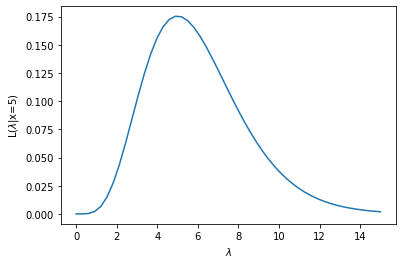

In [19]:
lambdas = np.linspace(0,15)
_x = 5
plt.plot(lambdas, [poisson_like(_x, l) for l in lambdas])
plt.xlabel('$\lambda$')
plt.ylabel('L($\lambda$|x={0})'.format(_x))

Looks like $\lambda$ = 5 is about right for $y$ = 5.

Try it out for other values of $y$. Does the optimal $\lambda$ remain the same? 

How is the likelihood function different than the probability distribution function (pdf)? The likelihood is a function of the parameter(s) *given the data*, whereas the pdf returns the probability of the data given a particular parameter value. 

Here is the pdf of the Poisson for $\lambda=5$.

Text(0, 0.5, 'Pr(X|$\\lambda$=5)')

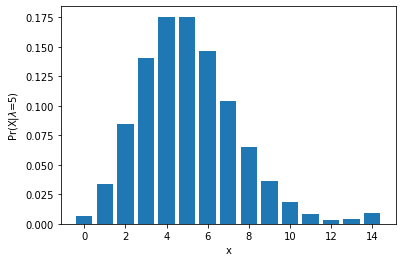

In [20]:
lam = 5
xvals = np.arange(15)
plt.bar(xvals, [poisson_like(x, lam) for x in xvals])
plt.xlabel('x')
plt.ylabel('Pr(X|$\lambda$=5)')

Ok, both curves look the same (kinda), but that is a coincidence. *It's not always like this*.

So we cannot locate one $\lambda$ that is optimal ***for all $y$'s***. So we have to ***compromise***. Specifically, we want the value of $\lambda$ which **maximizes the likelihood function**, because it yields a pdf that is the closest to the histogram of the data. 

In other words, our observations, which are a subset of all possible data which we can observe and record for a specific physical process, yield a histogram that we assume matches the pdf of all the data. So we model all possible data as a parametrized Poisson pdf. The Poisson pdf matches the histogram of the observed data the best when the likelihood function is maximal. And that happens when the area under the curve is maximal.

So, inference is reduced to an **optimization problem**.

## 3.3 The intuition behind the theory

Suppose that before the Mexico Grand Prix, Lewis Hamilton accrues 284 points out of 1,207 total points awarded. Having this data, we’d like to make a guess at the probability that Lewis Hamilton wins the Mexico Grand Prix.

The simplest guess here would be 284/1,207 = 24%, which is the best possible guess based on the data. 

For the sake of argument, let's say Lewis Hamilton won 10 out of 20 races.

Let's simplify that Lewis Hamilton has a single winning probability (let’s call this θ) throughout all races across the season, regardless of the uniqueness of each race and any complex factors like weather and Pirelli tires. In other words, we’re assuming each of LH's races as a [Bernoulli trial](https://en.wikipedia.org/wiki/Bernoulli_trial) with a winning probability θ.

With this assumption, we can describe the probability that LH wins k times ***out of n races*** for any given number k and n (k≤n). More precisely, we assume that the number of race wins for LH follows a [binomial distribution with parameter θ](https://en.wikipedia.org/wiki/Binomial_distribution).
The probability that LH wins k times out of n races, given the winning probability θ, is:

$$P(\text{k wins out of n races} \; | \; θ) = (^n_k) \; θ^k (1 - θ)^{n-k}$$

This simplification (describing the probability using just a single parameter θ regardless of real world complexity) is our statistical model, and θ is the parameter to be estimated.

Since we have observed data for this F1 season, which is 10 out of 20 wins for LH (let’s call this data as D), we can calculate P(D|θ) — the probability that this data D is observed for given θ. 

Let’s calculate P(D|θ) for $θ=0.1$ and $θ=0.7$ as *examples*.

$$P(\text{10 wins out of 20} \; | \; θ) = (^{20}_{10}) \; 0.1^{10} (0.9)^{10}$$

In [21]:
import math as m
P_10_wins_out_of_20_and_theta = m.factorial(20) // m.factorial(10) // m.factorial(10) * 0.1**10 * 0.9**10
P_10_wins_out_of_20_and_theta

6.442043387911565e-06

Wow, that's a ***very low probability***! So, if LH’s winning probability θ is actually 0.1, this data D (10 wins in 20 races) is ***extremely unlikely to be observed***.

Oh oh.

Then what if θ = 0.7?

$$P(\text{10 wins out of 20} \; | \; θ) = (^{20}_{10}) \; 0.7^{10} (0.3)^{10}$$

In [22]:
P_10_wins_out_of_20_and_theta = m.factorial(20) // m.factorial(10) // m.factorial(10) * 0.7**10 * 0.3**10
P_10_wins_out_of_20_and_theta

0.030817080900085003

Woooooow! That's a ***much higher probability***! 

So if LH’s winning probability θ is 0.7, this data D is ***much more likely to be observed*** than when θ = 0.1.

Based on this comparison, we would be able to say that θ is more likely to be 0.7 than 0.1 considering the actual observed data D. 

>**Note**: Instead of saying *the evidence are the observations, how do we get to the model*?, we say *given the evidence of a model with an unknown parameter, how likely are the observations*?

Here, we’ve been calculating the probability that D is observed for each θ, but at the same time, we can also say that we’ve been checking likelihood of each value of θ based on the observed data. Because of this, P(D|θ) is also considered as Likelihood of θ. 

The next question here is, what is the *exact value* of θ which maximizes the likelihood P(D|θ)? This is Maximum Likelihood Estimation!

The value of θ maximizing the likelihood can be obtained by having derivative of the likelihood function with respect to θ, and setting it to zero.

<br />
<center>
<img src =ipynb.images/mle-math.png width = 600 />
</center>

Since likelihood goes to zero when θ= 0 or 1, the value of θ that maximizes the likelihood is $\frac{k}{n}$.

$$ θ = \frac{k}{n}$$

In other words, the estimated value of θ, LH's winning percentage per race, is 10/20 = 50% when estimated with MLE. And that's also the intuitive value you would've picked if you knew that LH wins 10 out of 20 races, right? :-)

## 3.4 Nashville rainfall
Let's go back to our rainfall data:

In [23]:
precip = pd.read_table("data/nashville_precip.txt", index_col=0, na_values='NA', delim_whitespace=True)
precip.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38
1873,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94
1874,5.22,9.23,5.36,11.84,1.49,2.87,2.65,3.52,3.12,2.63,6.12,4.19
1875,6.15,3.06,8.14,4.22,1.73,5.63,8.12,1.60,3.79,1.25,5.46,4.30


Now let's put MLE to use with our Nashville rainfall data, where we used a gamma distribution instead of a Poisson distribution. So we need to maximize:

$$l = \prod_{i=1}^n \beta^{\alpha} x^{\alpha-1} e^{-x/\beta}\Gamma(\alpha)^{-1}$$ with respect to $(\alpha, \beta)$

In order to make the likelihood function more manageable (this is legit since `log` is monotonic with respect to its argument), the optimization is performed ***using a natural log transformation of the likelihood function***. In other words, we apply a **kernel method** transformation, which we learned about in our previous notebook. 

We are going to use the property that the *log of a product is the sum of the logs*:

$$ log(ab) = log(a) + log(b)$$

We want to maximize:

$$\begin{align}log(l)(\alpha,\beta) &= \sum_{i=1}^n \log[\beta^{\alpha} x^{\alpha-1} e^{-x/\beta}\Gamma(\alpha)^{-1}] \cr 
&= n[(\alpha-1)\overline{\log(x)} - \bar{x}\beta + \alpha\log(\beta) - \log\Gamma(\alpha)]\end{align}$$

(*so much easier to work in the log scale because the log of a product is the sum of the logs!*)

where $n = 2012 − 1871 = 141$ and the bar indicates an average over all *i*. We want to choose $\alpha$ and $\beta$ to maximize $l(\alpha,\beta)$.

Notice $l$ is infinite if any $x$ is zero. We do not have any zeros, but we do have an NA value for one of the October data, which we dealt with.

## 3.5 Solving the equation

To find the maximum of any function, we typically take the *derivative* with respect to the variable to be maximized, set it to zero and solve for that variable. 

$$\frac{\partial log(l)(\alpha,\beta)}{\partial \beta} = n\left(\frac{\alpha}{\beta} - \bar{x}\right) = 0$$

Which can be solved as $\beta = \alpha\; / \; \bar{x}$. However, plugging this into the derivative with respect to $\alpha$ yields:

$$\frac{\partial log(l)(\alpha,\beta)}{\partial \alpha} = \log(\alpha) + \overline{\log(x)} - \log(\bar{x}) - \frac{\partial log(\Gamma(\alpha))}{\partial\alpha} = 0$$

This has ***no closed form solution***! We must use ***numerical optimization***!

Numerical optimization algorithms take an initial "*guess*" at the solution, and iteratively improves the guess until it gets "*close enough*" to the answer.

Here, we will use [Newton-Raphson](https://en.wikipedia.org/wiki/Newton%27s_method) algorithm from [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html):

<div style="font-size: 120%;">  
$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$
</div>

In [28]:
from scipy.optimize import newton

Here is a graphical example of how Newton-Raphson converges on a solution: what is the $x$ for which  $f(x) = 0$, using derivatives:

Text(1.4706070287539936, -0.2, '$x_{n+1}$')

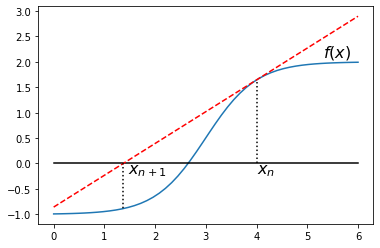

In [29]:
# some function
func = lambda x: 3./(1 + 400*np.exp(-2*x)) - 1
xvals = np.linspace(0, 6)
plt.plot(xvals, func(xvals))
plt.text(5.3, 2.1, '$f(x)$', fontsize=16)

# zero line
plt.plot([0,6], [0,0], 'k-')

# value at step n
plt.plot([4,4], [0,func(4)], 'k:')
plt.text(4, -.2, '$x_n$', fontsize=16)

# tangent line
tanline = lambda x: -0.858 + 0.626*x
plt.plot(xvals, tanline(xvals), 'r--')

# point at step n+1
xprime = 0.858/0.626
plt.plot([xprime, xprime], [tanline(xprime), func(xprime)], 'k:')
plt.text(xprime+.1, -.2, '$x_{n+1}$', fontsize=16)

Let $x_n$ be our current estimate. Then the next estimate $x_{n+1}$ is obtained as follows: Draw the tangent line at $(x_n,f(x_n))$. Then $x_{n+1}$ is the point where the tangent line meets the x-axis. That tangent line meets the x-axis at a point often much closer to the root of the curve than $x_n$.

To apply the Newton-Raphson algorithm, we need a function that returns a vector containing the **first and second derivatives** of the function with respect to the variable of interest (the second equation above, setting the derivative with respect to $\alpha$ to zero). 

`psi` and `polygamma` are complex functions of the Gamma function that result when you take first and second derivatives of that function. Specifically, 

[scipy.special.psi](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.psi.html) = $\frac{\partial log(\Gamma(\alpha))}{\partial\alpha}$ and 

[scipy.special.polygamma](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.polygamma.html) = $\frac{\partial^2 log(\Gamma(\alpha))}{\partial\alpha^2}$

and the derivative of the second equation above is:

$$\frac{\partial^2 log(l)(\alpha,\beta)}{\partial \alpha^2} = \frac{1}{\alpha} - \frac{\partial^2 log(\Gamma(\alpha))}{\partial\alpha^2}$$

Then are our fist and second derivatives of the second equation above, spelled out in python, are:

In [77]:
from scipy.special import psi, polygamma

# Note that log_mean and mean_log are parameters of the dlgamma function
dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

where `log_mean` and `mean_log` are $\log{\bar{x}}$ and $\overline{\log(x)}$, respectively.

In [31]:
# Calculate statistics
log_mean = precip.mean().apply(np.log)
mean_log = precip.apply(np.log).mean()

Now we use our `newton` function to find the value of $\alpha$ for which $$\frac{\partial log(l)(\alpha,\beta)}{\partial \alpha} = 0$$

In [32]:
# Alpha MLE for December
alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean[-1], mean_log[-1]))
alpha_mle

3.5189679152399616

And now plug this back into the solution for beta:

<div style="font-size: 120%;">  
$$ \beta  = \frac{\alpha}{\bar{X}} $$
</div>

In [33]:
beta_mle = alpha_mle/precip.mean()[-1]
beta_mle

0.8426160754841373

We can compare the fit of the estimates derived from MLE to those from our method of moments (MOM):

In [34]:
precip_mean = precip.mean()
precip_mean

precip_var = precip.var()
precip_var

alpha_mom = precip_mean ** 2 / precip_var
beta_mom = precip_var / precip_mean
alpha_mom, beta_mom

(Jan    2.953407
 Feb    3.043866
 Mar    4.617770
 Apr    4.293694
 May    3.526199
 Jun    2.980965
 Jul    4.017624
 Aug    2.999766
 Sep    2.309383
 Oct    2.467861
 Nov    3.692511
 Dec    3.219070
 dtype: float64, Jan    1.531684
 Feb    1.346249
 Mar    1.077920
 Apr    0.979219
 May    1.226724
 Jun    1.299403
 Jul    0.969593
 Aug    1.122522
 Sep    1.462581
 Oct    1.057799
 Nov    0.998206
 Dec    1.297344
 dtype: float64)

Let's plot both models and compare:

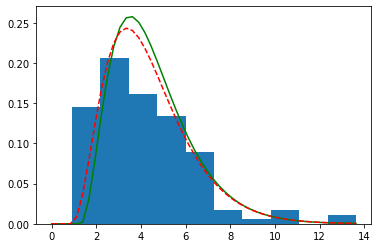

In [36]:
from scipy.stats.distributions import gamma

dec = precip.Dec
dec.hist(normed=True, bins=10, grid=False)
x = np.linspace(0, dec.max())
plt.plot(x, gamma.pdf(x, alpha_mom[-1], beta_mom[-1]), 'g-')
plt.plot(x, gamma.pdf(x, alpha_mle, beta_mle), 'r--')

Ooooooh... The red dotted curve is a *better model* of our data than the continuous mauve (purple) curve. So MLE gives us a ***better model*** than MOM!

For common distributions, `SciPy` includes methods for fitting via MLE, if you assume a certain pdf:

In [97]:
from scipy.stats import gamma

gamma.fit(precip.Dec)

(2.242751775315231, 0.6549460447018862, 1.570073932063466)

This fit is not directly comparable to our estimates, however, because SciPy's `gamma.fit` method fits an odd 3-parameter version of the gamma distribution. But don't let the three parameters  (alpha, loc, beta) provided throw you off! There's `alpha` and `beta` that you know of, and the other one is `loc`, the location at which the gamma distribution ***starts growing***, since you can liberally move the gamma along the x-axis.

In general, the gamma function has three parametrizations:

- With a shape parameter k and a scale parameter θ.
- With a shape parameter α = k and an inverse scale parameter β = 1/θ, called a rate parameter.
- With a shape parameter k and a mean parameter μ = k/β.

I already told you last notebook that the parametric gamma function has two possible expressions, using $\alpha$ and $\beta$, or $k$ and $\theta$.

It's possible to shift and/or scale the distribution using the loc and scale parameters. Specifically, gamma.pdf(x, alfa, loc, scale) is identically equivalent to gamma.pdf(y, alfa) / scale with y = (x - loc) / scale.

## 3.6 Another dataset example

Let's try our hands at another dataset that better illustrates the modeling process because it incorporates an improvement on the model.

We'll use `statsmodels`, a Python package for statistical data analyses, which will help us avoid the math!

<br />
<center>
<img src =ipynb.images/happy-cat.jpg width = 400 />
    No math baby!
</center>

## Lab \#2: Hearts dataset

`statsmodels` just like `R`, also contains real-world datasets that you can use to experiment with new methods. Let's load the **heart dataset**:

In [37]:
import numpy as np
import scipy.stats as st
import statsmodels.datasets
import matplotlib.pyplot as plt
%matplotlib inline
data = statsmodels.datasets.heart.load_pandas().data

Let's take a closer look at the dataframe:

In [38]:
data.head()

,survival,censors,age
0,15.0,1.0,54.3
1,3.0,1.0,40.4
2,624.0,1.0,51.0
3,46.0,1.0,42.5
4,127.0,1.0,48.0


In [39]:
data.tail()

,survival,censors,age
64,14.0,1.0,40.3
65,167.0,0.0,26.7
66,110.0,0.0,23.7
67,13.0,0.0,28.9
68,1.0,0.0,35.2


This dataset contains censored and uncensored data: a censor of 0 means that the patient was ***alive at the end of the study***, and thus we don't know the exact survival time. We only know that the patient survived at least the indicated number of days. 

Let's only keep uncensored data (thus introduce a [bias](https://en.wikipedia.org/wiki/Bias) toward patients that ***did not survive very long*** after their transplant):

In [40]:
data = data[data.censors == 1]
survival = data.survival

Let's take a look at the data graphically, by plotting the raw survival data and the histogram. Notice how the data is 2D, however the histogram is really a 1D function: It gives us the possible $y$'s and their ***distribution***.

Text(0, 0.5, 'Number of patients')

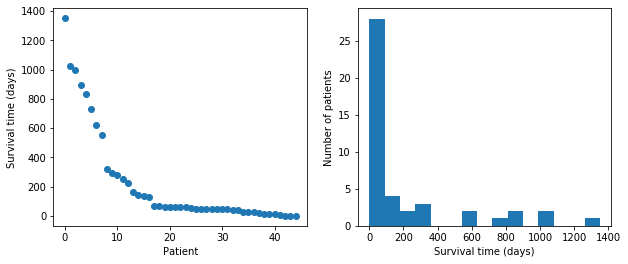

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(sorted(survival)[::-1], 'o')
ax1.set_xlabel('Patient')
ax1.set_ylabel('Survival time (days)')

ax2.hist(survival, bins=15)
ax2.set_xlabel('Survival time (days)')
ax2.set_ylabel('Number of patients')

We observe that the histogram is decreasing very rapidly! Patients died *fast*!

Eyeballing the data, let's try to fit an [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) to the data. Isn't that would *you* would try?

According to the exponential model, S (number of days of survival) is an exponential random variable with the parameter λ, and the observations $s_i$ are sampled from this distribution. Let the sample **mean** be:

$$\overline s = \frac 1 n \sum s_i$$

The likelihood function of an exponential distribution is as follows:

$$\mathcal{L}(\lambda, \{s_i\}) = P(\{s_i\} \mid \lambda) = \lambda^n \exp\left(-\lambda n \overline s\right)$$

Here's the proof:

\begin{align*}
\mathcal{L}(\lambda, \{s_i\}) &= P(\{s_i\} \mid \lambda) &\\
&= \prod_{i=1}^n P(s_i \mid \lambda) & \textrm{(by independence of the $s_i$)}\\
&= \prod_{i=1}^n \lambda \exp(-\lambda s_i) &\\
&= \lambda^n \exp\left(-\lambda \sum_{i=1}^n s_i\right) &\\
&= \lambda^n \exp\left(-\lambda n \overline s\right) &
\end{align*}

Here, $\overline s$ is the sample mean.

To find the maximum of this function, let's compute its derivative function with respect to $λ$:

$$\frac{d\mathcal{L}(\lambda, \{s_i\})}{d\lambda} = \lambda^{n-1} \exp\left(-\lambda n \overline s \right) \left( n - n \lambda \overline s \right)$$

The root of this derivative is therefore $λ=1\;/\;\overline s$. We're lucky here, the exponential is simple to diffferentiate.  In more complex situations, we would require numerical optimization methods, like Newton-Raphson above, to maximize the likelihood function.

Let's compute this parameter ***numerically***:

In [42]:
smean = survival.mean()
rate = 1. / smean
rate

0.004478503184713376

Let's compare the fitted exponential distribution to the data. We first need to generate linearly spaced values for the x-axis (days):

In [43]:
smax = survival.max()
days = np.linspace(0., smax, 1000)
# bin size: interval between two consecutive values in `days`
dt = smax / 999.

We get the probability density function of the exponential distribution with` SciPy`. 

The parameter is the scale, the inverse of the estimated rate.

In [44]:
dist_exp = st.expon.pdf(days, scale=1. / rate)

Let's plot the histogram and the obtained distribution. 

We need to rescale the theoretical distribution to the histogram (depending on the bin size and the total number of data points):

Text(0, 0.5, 'Number of patients')

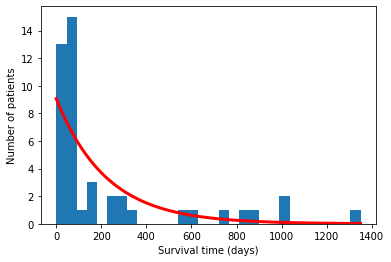

In [45]:
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(survival, nbins)
ax.plot(days, dist_exp * len(survival) * smax / nbins,
        '-r', lw=3)
ax.set_xlabel("Survival time (days)")
ax.set_ylabel("Number of patients")

Hmmm... 

What do you think?

The fit between the model and our data is ***ok-ish***, but not ***perfect***..

## 3.7 A better model

Just like with our probability function `p`, you can avoid the math when you can write python! 

You can also avoid the math if you know how to write python and you know where to find the useful libraries!

`SciPy` actually integrates numerical maximum likelihood routines for a large number of distributions. Let's leverage `SciPy` to estimate the parameter of the exponential distribution:

In [46]:
dist = st.expon
args = dist.fit(survival)
args

(1.0, 222.2888888888889)

Before we plot, let's perform a **goodness of fit test**. 

A good statistical goodness of fit test is the [Kolmogorov-Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test), also known as **KS** test. it is sensitive to differences in *both* location and shape of the empirical [cumulative distribution functions](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (cdf) of the two samples.

The cdf is the area under the pdf: the cdf evaluated at $x$, is the probability that $X$ will take a value less than or equal to $x$. In the case of scalar continuous distributions, it gives the area under the pdf from minus infinity to $x$.

In [47]:
st.kstest(survival, dist.cdf, args)

KstestResult(statistic=0.36199693810792966, pvalue=8.647045785208746e-06)

Here, the `pvalue` is very low: the null hypothesis (stating that the observed data stems from an exponential distribution with a maximum likelihood rate parameter) can be rejected with high confidence!

- We'll talk about p-values and null-hypotheses in our ***next lecture***. They're important point estimators in classical statistical inference. Still very much used in industry (but not as powerful as *Bayesian inference*, which yields pdfs instead of point estimates).

*Oh no*...! The ***KS*** test says that our exponential distribution is thus ***not a good fit for the data***!

Let's try another distribution, the [Birnbaum-Sanders distribution](https://en.wikipedia.org/wiki/Birnbaum-Saunders_distribution), which is typically used to model **failure times**. You wouldn't know about this model distribution ***without some experience in data science***.

In [48]:
dist = st.fatiguelife
args = dist.fit(survival)
st.kstest(survival, dist.cdf, args)

KstestResult(statistic=0.1877344610194689, pvalue=0.07320887196398818)

This time, the `pvalue` is about 0.073, so that we would ***not reject the null hypothesis*** with a five percent confidence level!

Ok, let's plot now to see if we get a better fit:

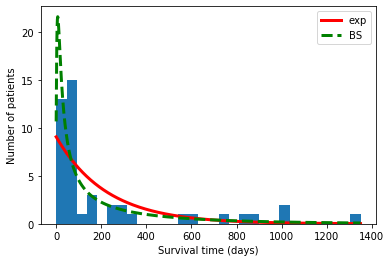

In [49]:
dist_fl = dist.pdf(days, *args)
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(survival, nbins)
ax.plot(days, dist_exp * len(survival) * smax / nbins,
        '-r', lw=3, label='exp')
ax.plot(days, dist_fl * len(survival) * smax / nbins,
        '--g', lw=3, label='BS')
ax.set_xlabel("Survival time (days)")
ax.set_ylabel("Number of patients")
ax.legend()

Yes! Birnbaum-Sanders (BS) fits the data a lot better than the exp distribution!

How did I know about the BS distribution? I googled. And I thought it was very funny that it was called the ***BS distribution*** :-)

Once again, 

- The maximum likelihood estimate (MLE) for the rate parameter(s) is, by definition, the value of the parameters that maximizes the likelihood function. It is the parameter(s) that maximize the probability of observing the data, assuming that the observations are actually sampled from the distribution we picked as a model.

We then either verify by plotting the data and the model with the MLE parameter(s) and see if it's a good match, or use goodness of fit tests like the **KS** test to get a more objective estimate. There are [many](https://en.wikipedia.org/wiki/Goodness_of_fit) different goodness of fit tests! Which we pick is part of the art!
If we are wrong and the fit is not very good, back to the drawing board for another model!

<br />
<center>
<img src =ipynb.images/frustration.png width = 400 />
</center>

### Once you have a correct data model..

You can keep the model and its parameters, and ***throw away the data***. 

To generate a new value of the pseudorandom variable, use a series of invocations of the `.rvs()` method for your model!

# 4. Kernel Density Estimates

You can also estimate a probability distribution ***nonparametrically*** using [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation.) (KDE). That is actually how `seaborne` plots the function
best matching a histogram.

In some instances, you may not be interested in the parameters of a particular distribution of data, but just a smoothed representation of the data at hand. In this case, you can estimate the disribution *non-parametrically* (i.e. making no assumptions about the form of the underlying distribution) using [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE). 

KDE is a fundamental data smoothing problem where inferences about the population are made based on a finite data sample.

The kernel density estimator of a set of n points ${x_i}$ is given as:

$$\hat{f}_h(x) = \frac{1}{nh} \sum_{i=1}^n K\Big(\frac{x-x_i}{h}\Big)$$

Here, $h>0$ is a scaling parameter (the bandwidth) and $K(u)$ is the kernel, a symmetric function that integrates to 1. This estimator is to be compared with a classical histogram, where the kernel would be a top-hat function (a rectangle function taking its values in ${0,1}$), but the blocks would be located on a regular grid instead of the data points.

Multiple kernels can be chosen. Here, we chose a Gaussian kernel, so that the KDE is the superposition of Gaussian functions centered on all the data points. It is an estimation of the density.

The choice of the bandwidth is not trivial; there is a [tradeoff](https://en.wikipedia.org/wiki/Bias-variance_dilemma.) between a too low value (small bias, high variance: overfitting) and a too high value (high bias, small variance: underfitting). 

There are several methods to automatically choose a sensible bandwidth. SciPy uses a rule of thumb called Scott's Rule: $h = n^{\frac{-1}{d + 4}}$

The following figure illustrates the KDE. The sample dataset contains four points in [0,1] (black lines). The estimated density is a smooth curve, represented here with different bandwidth values.

<br />
<center>
<img src =ipynb.images/kde.png width = 600 />
</center>

## 4.1 Some random data

In [60]:
# Some random data
y = np.random.random(50) * 10
y

array([1.54661741, 4.11882885, 7.93114265, 9.59888116, 6.34300397,
       3.01861318, 8.31342781, 9.8811831 , 4.92473754, 4.57596023,
       6.87428766, 5.13050757, 3.30329287, 3.56015118, 1.34982449,
       0.48075301, 6.4184618 , 5.27836981, 6.79938569, 2.80076453,
       2.71317737, 8.96879193, 8.99838238, 9.82597393, 9.74404949,
       0.83884809, 8.40337361, 5.93939121, 9.29022714, 9.86396921,
       8.66179671, 4.70632   , 1.59894208, 0.67741844, 1.96201998,
       7.2444757 , 3.87440696, 1.43704462, 3.48247172, 0.6328271 ,
       3.7684364 , 3.42948928, 6.89522674, 8.38917095, 0.79384139,
       9.49524922, 3.79629547, 8.20974517, 1.68573565, 2.91545698])

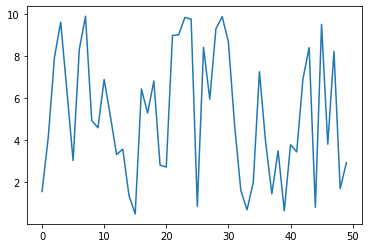

In [61]:
plt.plot(y)

d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([0.17020498, 0.13616398, 0.06808199, 0.06808199, 0.10212299,
        0.20424597, 0.06808199, 0.10212299, 0.034041  , 0.06808199,
        0.13616398, 0.034041  , 0.034041  , 0.17020498, 0.10212299,
        0.20424597]),
 array([0.48075301, 1.06827989, 1.65580677, 2.24333365, 2.83086053,
        3.41838741, 4.00591429, 4.59344117, 5.18096805, 5.76849494,
        6.35602182, 6.9435487 , 7.53107558, 8.11860246, 8.70612934,
        9.29365622, 9.8811831 ]),
 <a list of 16 Patch objects>)

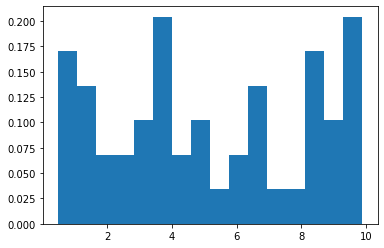

In [62]:
plt.hist(y, bins=16, normed=True)

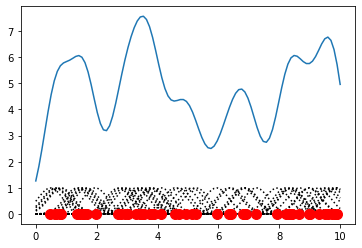

In [63]:
from scipy.stats.distributions import norm

x = np.linspace(0, 10, 100)

# Smoothing parameter
s = 0.4

# Calculate the kernels
kernels = np.transpose([norm.pdf(x, yi, s) for yi in y])

#plt.plot(x, y)
plt.plot(x, kernels, 'k:')
plt.plot(x, kernels.sum(1))
plt.plot(y, np.zeros(len(y)), 'ro', ms=10)

SciPy implements a Gaussian KDE that automatically chooses an appropriate bandwidth. 

## 4.2 Bimodal distribution

Let's create a **bi-modal** distribution of data that is not easily summarized by a known parametric distribution:

In [64]:
# Create a bi-modal distribution with a mixture of Normals.
x1 = np.random.normal(0, 3, 50)
x2 = np.random.normal(4, 1, 50)

# Append by row
x = np.r_[x1, x2]

d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([0.01175674, 0.02351348, 0.07054044, 0.03527022, 0.09405392,
        0.20574296, 0.14108089, 0.00587837]),
 array([-5.78705126, -4.08589948, -2.38474771, -0.68359593,  1.01755585,
         2.71870762,  4.4198594 ,  6.12101118,  7.82216296]),
 <a list of 8 Patch objects>)

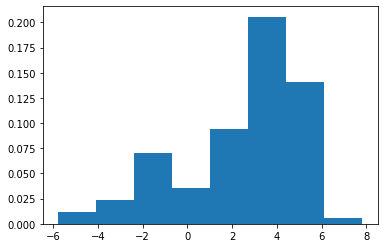

In [65]:
plt.hist(x, bins=8, normed=True)

Let's use kde:

d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


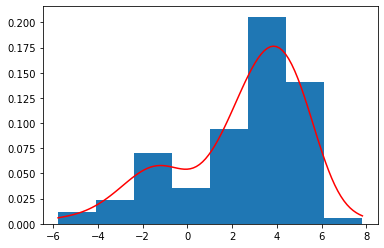

In [66]:
from scipy.stats import kde

density = kde.gaussian_kde(x)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.hist(x, bins=8, normed=True)
plt.plot(xgrid, density(xgrid), 'r-')

Oooooh... Nice fit!

## 4.3 A spatial distribution (2D)

We look at the geographical locations of tropical cyclones from 1848 to 2013, based on data provided by the NOAA, the US' National Oceanic and Atmospheric Administration.

We use a kernel density estimation (KDE) to estimate that pdf.

First, install a [map server](https://pypi.org/project/geos/):
```(python)
pip install geos
```

If you want a full geometry engine (*optional*), look [here](https://trac.osgeo.org/geos).

Then, import the [cartopy](http://scitools.org.uk/cartopy/) library:
```(python)
conda install cartopy
```

<br />
<center>
<img src =ipynb.images/cartopy-install.png width = 900 />
</center>

In [67]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import cartopy.crs as ccrs
%matplotlib inline

 Open the data with pandas:

In [68]:
# www.ncdc.noaa.gov/ibtracs/index.php?name=wmo-data
df = pd.read_csv('data/Allstorms.ibtracs_wmo.v03r05.csv')

This dataset contains information about most storms since 1848. A single storm may appear multiple times across several consecutive days.

In [69]:
df[df.columns[[0, 1, 3, 8, 9]]].head()

,Serial_Num,Season,Basin,Latitude,Longitude
0,1848011S09080,1848,SI,-8.6,79.8
1,1848011S09080,1848,SI,-9.0,78.9
2,1848011S09080,1848,SI,-10.4,73.2
3,1848011S09080,1848,SI,-12.8,69.9
4,1848011S09080,1848,SI,-13.9,68.9


Use pandas' `groupby()` function to obtain the average location of every storm:

In [70]:
dfs = df.groupby('Serial_Num')
pos = dfs[['Latitude', 'Longitude']].mean()
x = pos.Longitude.values
y = pos.Latitude.values
pos.head()

,Latitude,Longitude
Serial_Num,,
1848011S09080,-15.918182,71.854545
1848011S15057,-24.116667,52.016667
1848061S12075,-20.528571,65.342857
1851080S15063,-17.325000,55.400000
1851080S21060,-23.633333,60.200000


Let's display the storms on a map with cartopy! 

This toolkit allows us to easily project the geographical coordinates on the map.

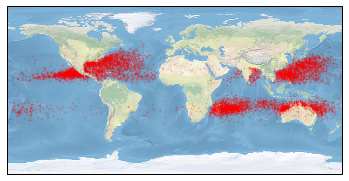

In [71]:
# We use a simple equirectangular projection,
# also called Plate Carree.
geo = ccrs.Geodetic()
crs = ccrs.PlateCarree()
# We create the map plot.
ax = plt.axes(projection=crs)
# We display the world map picture.
ax.stock_img()
# We display the storm locations.
ax.scatter(x, y, color='r', s=.5, alpha=.25, transform=geo)

 Before performing the kernel density estimation, we transform the storms' positions from the **geodetic coordinate system** (longitude and latitude) into the map's coordinate system, called **plate carrée**.

In [72]:
h = crs.transform_points(geo, x, y)[:, :2].T
h.shape

(2, 6940)

Now, we perform the kernel density estimation on our (2, N) array.

In [73]:
kde = st.gaussian_kde(h)

The `gaussian_kde()` routine returned a Python function. To see the results on a map, we need to evaluate this function on a 2D grid spanning the entire map. We create this grid with meshgrid(), and we pass the x and y values to the kde() function:

In [74]:
k = 100
# Coordinates of the four corners of the map.
x0, x1, y0, y1 = ax.get_extent()
# We create the grid.
tx, ty = np.meshgrid(np.linspace(x0, x1, 2 * k),
                     np.linspace(y0, y1, k))
# We reshape the grid for the kde() function.
mesh = np.vstack((tx.ravel(), ty.ravel()))
# We evaluate the kde() function on the grid.
v = kde(mesh).reshape((k, 2 * k))

Before displaying the KDE heatmap on the map, we need to use a special colormap with a transparent channel. This will allow us to superimpose the heatmap on the stock image:

In [75]:
# [https://stackoverflow.com/a/37334212/1595060](https://stackoverflow.com/a/37334212/1595060)
cmap = plt.get_cmap('Reds')
my_cmap = cmap(np.arange(cmap.N))
my_cmap[:, -1] = np.linspace(0, 1, cmap.N)
my_cmap = ListedColormap(my_cmap)

Finally, we display the estimated density with imshow():

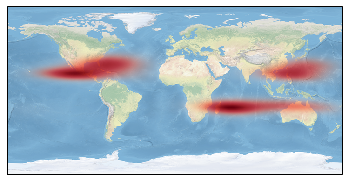

In [76]:
ax = plt.axes(projection=crs)
ax.stock_img()
ax.imshow(v, origin='lower',
          extent=[x0, x1, y0, y1],
          interpolation='bilinear',
          cmap=my_cmap)

Ooooh! What a nice model! And... no math!

# 5. Conclusion: Limitations of MLE and classical statistical estimation

What do you ***need to know***, from classical statistics, to succeed in your data science interview?

- Data science is about building a model from the data so that you can throw away the data (which moreover also has noise that we don't want), and use the model to reproduce the data and do predictions. Example: Weather people!

- MOM equates the empirical and theoretical moments to yield the parameters of your model. 

- MLE gives you the value which maximises the Likelihood P(D|θ). 

- [Maximum a Posteriori estimation](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP), which we skipped over but you can read about in wikipedia, yields the value which maximises the posterior probability $P(θ\;|\;D)$. As both methods give you a single fixed value, they’re considered to be **point estimators**.

- How to numerically evaluate the parameters of your model using the first two methods. You *do not need to know the math* (but if you understand it, that is a good thing!)

**Bayesian inference**, as we will see soon, ***fully calculates the posterior probability distribution***, as Bayes' formula below. 

$$p(θ \; | \; D) = \frac{p(D \; | \; θ) \; p(θ)}{p(D)}$$

Hence the output is not a single value, i.e. a **point estimate** for the parameters of your model, but a **probability density function** (when θ is a continuous variable) or a ***probability mass function*** (when θ is a discrete variable) ***for the parameters of your model***. 

That way, you know what the most likely value is, ***but also the amount of error you might be making***!

Ooooooh....

>**Super important**: MLE and MAP return a single fixed value(s) for the model parameter(s), Bayesian inference returns functions (pdfs)  instead!

For a preview of Bayesian statistical estimation, here's an example:

Assume you’re in a casino with full of slot machines with 50% winning probability. After playing for a while, you hear a rumour that there’s ***one special slot machine*** with 67% winning probability! But you don't know which one it is (yet)!

Now, you’re observing people playing at 2 suspicious slot machines (you’re sure that one of those is the special slot machine!) and get the following data.

Machine A: 3 wins out of 4 plays
Machine B: 81 wins out of 121 plays

By intuition, you would think machine B is the special one! Because 3 wins out of 4 plays on machine A could just happen by chance. But machine B’s data doesn’t look like it's happening by chance!

The posterior probability distribution P(θ|D), calculated as a Gamma function, is plotted below for the two machines:

<br />
<center>
<img src =ipynb.images/tricked-slot-machines.png width = 400 />
</center>

Although both distributions have their mode on θ=0.666 (MLE estimate), the shapes of the distributions are quite different. Density around the mode is much higher in the distribution of machine B than the one of machine A. *We know more about Machine B than about Machine A!*

So a pdf yields much more information than a point estimate. In particular, it tells us about errors in the estimation. And that is very important when a model is making a potentially dangerous prediction (e.g. ***Tesla: Yup, I'm pretty sure you can drive 120 mph on this road***).

***Ummm... Tesla computer, what's an estimation of the error you might be making in your prediction?***

<br />
<center>
<img src =ipynb.images/tesla-model-3.jpg width = 300 />
</center>

So we will now turn our attention to **Bayesian estimation** of our models, rather than **point estimates**. 

Bayes' formula is actually pretty complex. Specifically, the term in the denominator, a **marginal probability**,  needs to be calculated for every possible θ:

<br />
<center>
<img src =ipynb.images/bayes-complex.png width = 350 />
</center>

That integral sum (for the continuous case, a simple sun for discrete cases) is the reason why we had to wait for powerful laptops before we could actually put Bayesian estimation to practice. 

When the model is ***analytic***, like the ones in this notebook, solutions are forthcoming, albeit with a bit of math. But that is rarely the case in real-world applications. We then need to use ***Monte Carlo*** and other probabilistic programming methodologies as substitute for direct integral computation. That is what we'll look at next week.